In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
data['date']=pd.to_datetime(data['date'])
data['month']=data['date'].dt.month
data['year']=data['date'].dt.year

In [6]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,6.574423,2014.322954
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.115308,0.467616
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sn

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

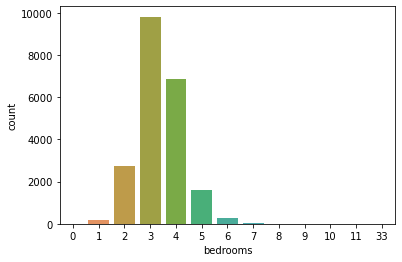

In [9]:
sn.countplot(x='bedrooms',data=data)

<AxesSubplot:xlabel='month', ylabel='count'>

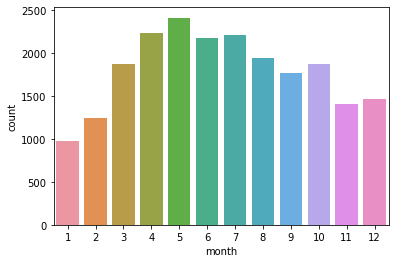

In [10]:
sn.countplot(x='month',data=data)

In [11]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [12]:
dscr_columns=[u'bedrooms',u'bathrooms',u'floors',u'waterfront',u'view',u'condition',u'grade',u'month',u'year']

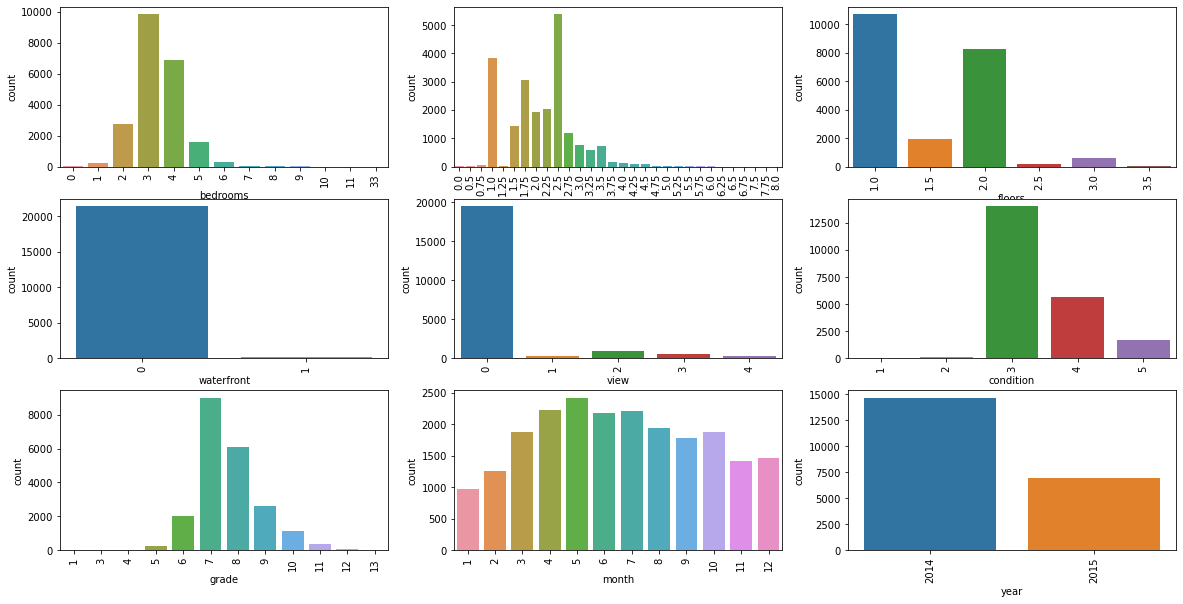

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
for variable, subplot in zip(dscr_columns, ax.flatten()):
    sn.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

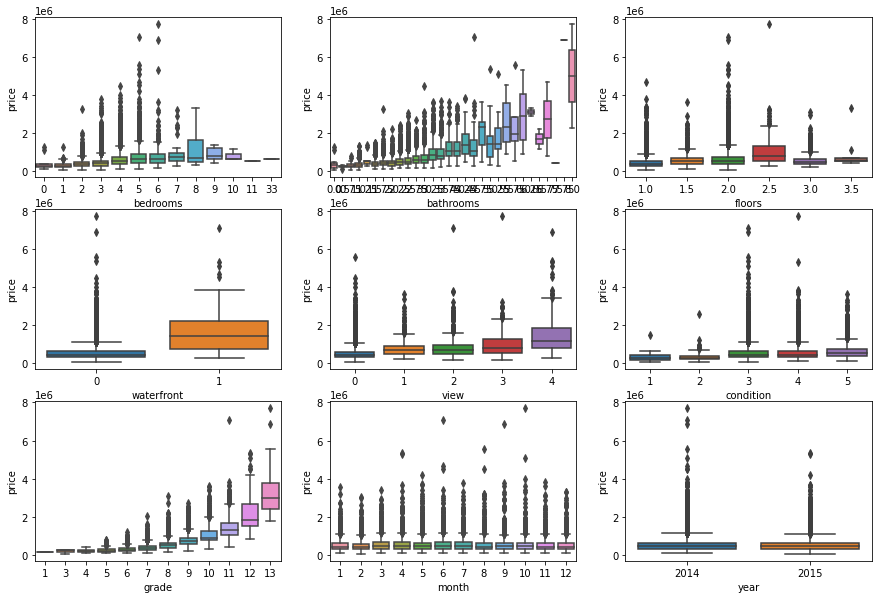

In [14]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(dscr_columns, ax.flatten()):
    sn.boxplot(x=var, y='price', data=data, ax=subplot)

In [15]:
cont_col=[u'sqft_living',u'sqft_lot',u'sqft_above',u'sqft_basement',u'yr_built',u'yr_renovated', u'zipcode',u'lat',u'long',u'sqft_living15',u'sqft_lot15']

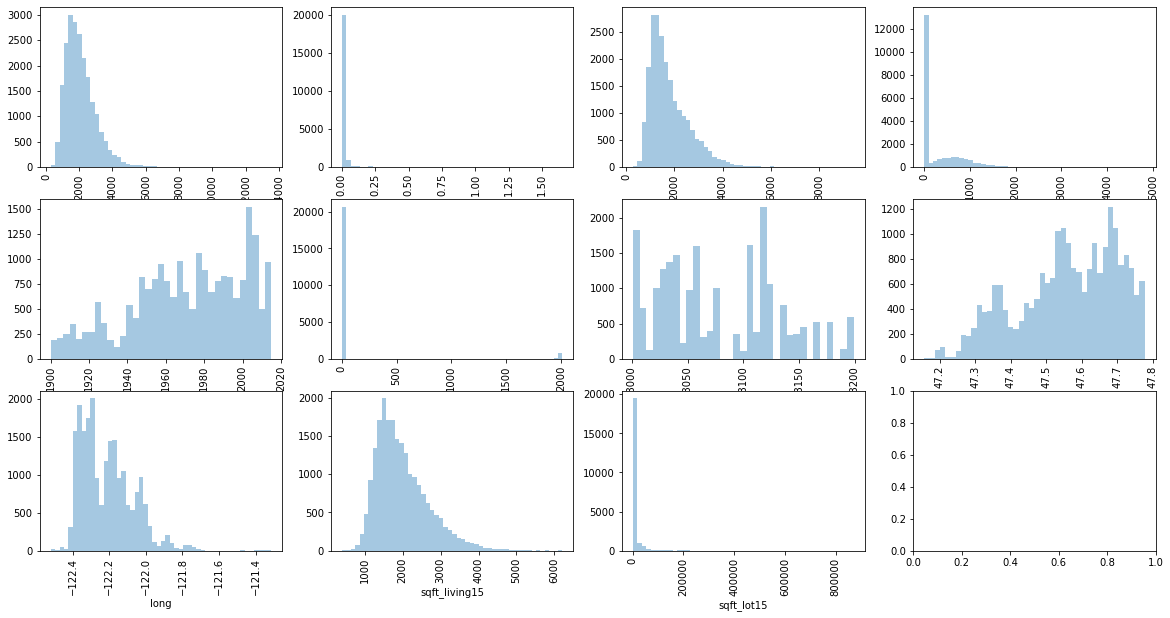

In [16]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for variable, subplot in zip(cont_col, ax.flatten()):
    sn.distplot(data[variable], ax=subplot,kde=False)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

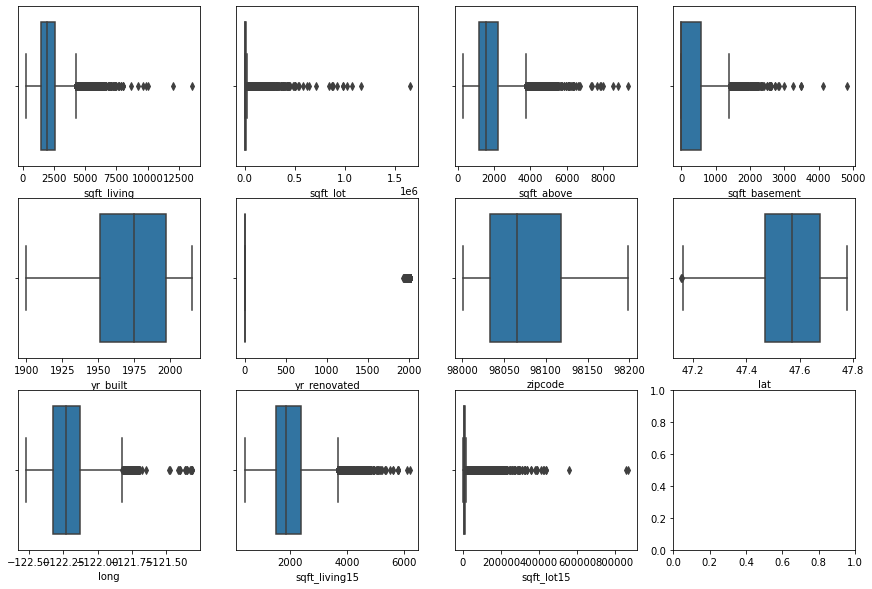

In [17]:
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
for var, subplot in zip(cont_col, ax.flatten()):
    sn.boxplot(data[var], ax=subplot)

In [18]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,6.574423,2014.322954
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.115308,0.467616
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000


In [19]:
np.where(data['bedrooms']==33),np.where(data['bedrooms']==11)

((array([15870], dtype=int64),), (array([8757], dtype=int64),))

In [20]:
data=data.drop(data.index[15870])
data=data.drop(data.index[8757])
data.shape

(21611, 23)

<AxesSubplot:xlabel='price', ylabel='Density'>

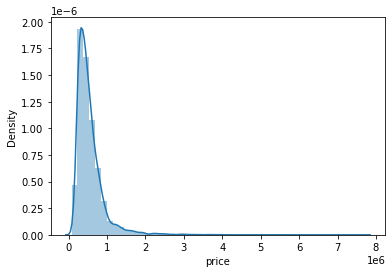

In [21]:
sn.distplot(data['price'])

<AxesSubplot:xlabel='price'>

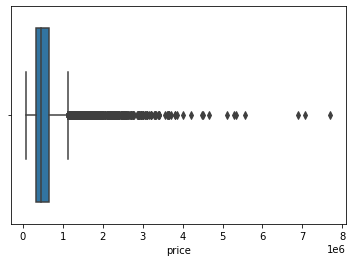

In [22]:
sn.boxplot(data['price'])

<AxesSubplot:xlabel='price', ylabel='Density'>

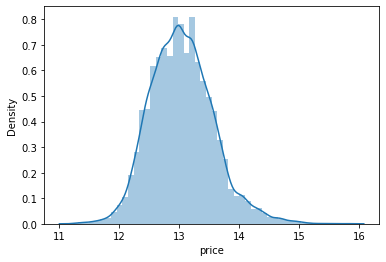

In [23]:
sn.distplot(np.log(data['price']))

<AxesSubplot:xlabel='price'>

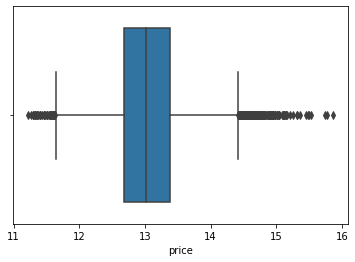

In [24]:
sn.boxplot(np.log(data['price']))

In [25]:
import statsmodels.api as sm

In [26]:
X=data.drop(['id','date','price'],axis=1)
y=data['price']

In [27]:
y=np.log(y)

In [28]:
x=sm.add_constant(X)

In [29]:
model=sm.OLS(y,x)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     3862.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:15:25   Log-Likelihood:                -803.59
No. Observations:               21611   AIC:                             1647.
Df Residuals:                   21591   BIC:                             1807.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -132.6295     12.436    -10.665      0.000    -157.004    -108.255
bedrooms         -0.0144      0.002     -5.839      0.000      -0.019      -0.010
bathrooms         0.0700      0.004     17.213      0.000       0.062       0.078
sqft_living    9.663e-05   2.85e-06     33.937      0.000    9.11e-05       0.000
sqft_lot       4.636e-07   5.98e-08      7.749      0.000    3.46e-07    5.81e-07
floors            0.0761      0.004     16.953      0.000       0.067       0.085
waterfront        0.3710      0.022     17.116      0.000       0.329       0.414
view              0.0597      0.003     22.330      0.000       0.054       0.065
condition         0.0650      0.003     22.090      0.000       0.059       0.071
grade             0.1591      0.003     59.147      0.000       0.154       0.164
sqft_above     4.052e-05   2.82e-06     14.386      0.000     3.5e-05     4.6e-05
sqft_basement  5.622e-05   3.31e-06     17.001      0.000    4.97e-05    6.27e-05
yr_built         -0.0034   9.07e-05    -37.626      0.000      -0.004      -0.003
yr_renovated   3.826e-05   4.57e-06      8.376      0.000    2.93e-05    4.72e-05
zipcode          -0.0006   4.12e-05    -15.707      0.000      -0.001      -0.001
lat               1.4039      0.013    104.708      0.000       1.378       1.430
long             -0.1585      0.016     -9.666      0.000      -0.191      -0.126
sqft_living15  9.885e-05    4.3e-06     22.962      0.000    9.04e-05       0.000
sqft_lot15    -2.605e-07   9.15e-08     -2.847      0.004    -4.4e-07   -8.12e-08
month             0.0023      0.001      2.623      0.009       0.001       0.004
year              0.0633      0.006     10.755      0.000       0.052       0.075
==============================================================================
Omnibus:                      387.607   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              790.214
Skew:                          -0.048   Prob(JB):                    2.55e-172
Kurtosis:                       3.932   Cond. No.                     5.17e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.19e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Assumptions of Regression

Text(0.5, 1.0, 'Residuals vs. Predicted Value')

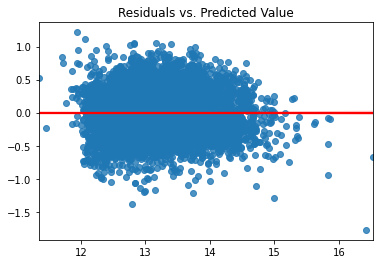

In [30]:
fitted_vals = model.predict()
resids = model.resid

sn.regplot(x=fitted_vals, y=resids,line_kws={'color':'red'})
plt.title('Residuals vs. Predicted Value')

In [31]:
from scipy import stats

<AxesSubplot:ylabel='Density'>

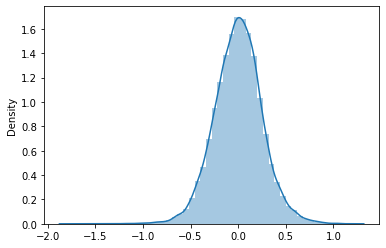

In [32]:
sn.distplot(model.resid)

((array([-3.99701367, -3.78178933, -3.66405957, ...,  3.66405957,
          3.78178933,  3.99701367]),
  array([-1.77441423, -1.37935378, -1.28881499, ...,  1.05653678,
          1.11548171,  1.21594974])),
 (0.25050750211329814, 1.7104844495542918e-12, 0.997313586797661))

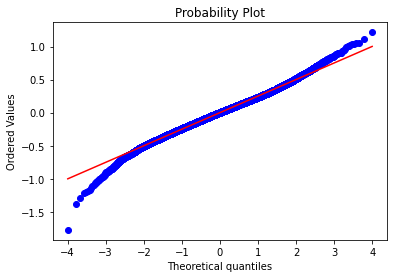

In [33]:
stats.probplot(resids, plot=sn.mpl.pyplot)

In [34]:
resids_standardized = model.get_influence().resid_studentized_internal

<AxesSubplot:>

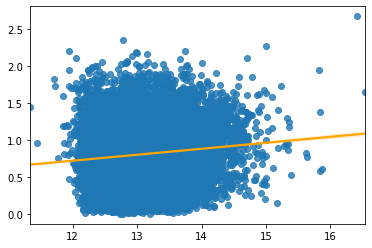

In [35]:
sn.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)),line_kws={'color':'orange'})

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
vif1= [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.DataFrame(vif1[1:],index=x.columns[1:])


,0
bedrooms,1.710074
bathrooms,3.362001
sqft_living,inf
sqft_lot,2.102780
floors,2.012528
waterfront,1.204138
view,1.436098
condition,1.253635
grade,3.423022
sqft_above,inf


In [38]:
X2=X.drop(['sqft_living','sqft_above','sqft_basement'],axis=1)
x1=sm.add_constant(X2)

In [39]:
model2=sm.OLS(y,x1)
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     4030.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:15:28   Log-Likelihood:                -1372.3
No. Observations:               21611   AIC:                             2781.
Df Residuals:                   21593   BIC:                             2924.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -137.4990     12.758    -10.778      0.000    -162.505    -112.493
bedrooms          0.0153      0.002      6.480      0.000       0.011       0.020
bathrooms         0.1281      0.004     34.051      0.000       0.121       0.135
sqft_lot       5.692e-07   6.13e-08      9.284      0.000    4.49e-07    6.89e-07
floors            0.0667      0.004     16.131      0.000       0.059       0.075
waterfront        0.3946      0.022     17.755      0.000       0.351       0.438
view              0.0664      0.003     24.585      0.000       0.061       0.072
condition         0.0669      0.003     22.228      0.000       0.061       0.073
grade             0.1917      0.003     75.529      0.000       0.187       0.197
yr_built         -0.0039    9.2e-05    -42.273      0.000      -0.004      -0.004
yr_renovated   3.928e-05   4.69e-06      8.376      0.000    3.01e-05    4.85e-05
zipcode          -0.0006   4.22e-05    -13.905      0.000      -0.001      -0.001
lat               1.3957      0.014    102.124      0.000       1.369       1.422
long             -0.1408      0.017     -8.504      0.000      -0.173      -0.108
sqft_living15     0.0002   4.05e-06     37.460      0.000       0.000       0.000
sqft_lot15    -1.003e-07   9.38e-08     -1.070      0.285   -2.84e-07    8.35e-08
month             0.0027      0.001      2.991      0.003       0.001       0.004
year              0.0644      0.006     10.659      0.000       0.053       0.076
==============================================================================
Omnibus:                      339.937   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              663.024
Skew:                           0.035   Prob(JB):                    1.06e-144
Kurtosis:                       3.855   Cond. No.                     7.32e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Residuals vs. Predicted Value')

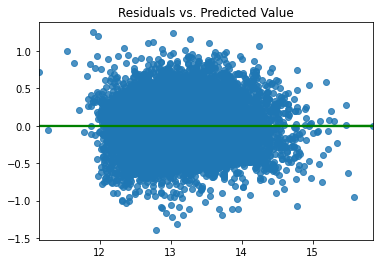

In [40]:
fitted_vals2 = model2.predict()
resids2 = model2.resid

sn.regplot(x=fitted_vals2, y=resids2,line_kws={'color':'green'})
plt.title('Residuals vs. Predicted Value')

<AxesSubplot:ylabel='Density'>

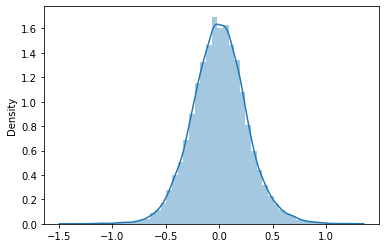

In [41]:
sn.distplot(model2.resid)

((array([-3.99701367, -3.78178933, -3.66405957, ...,  3.66405957,
          3.78178933,  3.99701367]),
  array([-1.3918871 , -1.31454125, -1.21971955, ...,  1.19517595,
          1.23900564,  1.24834925])),
 (0.25723436901362323, 1.4478252137488205e-12, 0.9974950147906488))

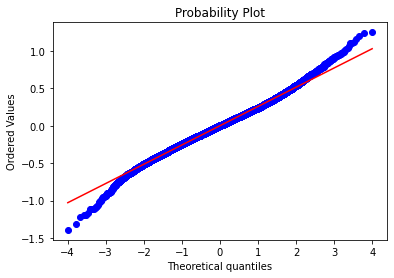

In [42]:
stats.probplot(resids2, plot=sn.mpl.pyplot)

<AxesSubplot:>

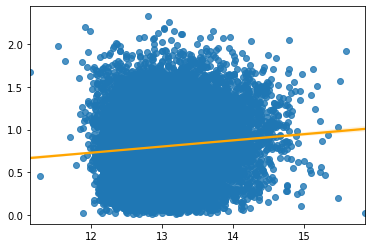

In [43]:
resids_standardized2 = model2.get_influence().resid_studentized_internal
sn.regplot(x=fitted_vals2, y=np.sqrt(np.abs(resids_standardized2)),line_kws={'color':'orange'})

In [44]:
vif2 = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
pd.DataFrame({'vif': vif2[1:]}, index=x1.columns[1:])

,vif
bedrooms,1.496166
bathrooms,2.727238
sqft_lot,2.094491
floors,1.617324
waterfront,1.201073
view,1.392093
condition,1.245371
grade,2.889992
yr_built,2.372479
yr_renovated,1.151167


## residual & features are uncorreleated

In [45]:
from scipy.stats.stats import pearsonr

for column in x.columns:
    corr_test = pearsonr(x[column], model.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: const --- correlation: nan, p-value: nan
Variable: bedrooms --- correlation: -0.0000, p-value: 1.0000
Variable: bathrooms --- correlation: 0.0000, p-value: 1.0000
Variable: sqft_living --- correlation: 0.0000, p-value: 1.0000
Variable: sqft_lot --- correlation: 0.0000, p-value: 1.0000
Variable: floors --- correlation: 0.0000, p-value: 1.0000
Variable: waterfront --- correlation: 0.0000, p-value: 1.0000
Variable: view --- correlation: 0.0000, p-value: 1.0000
Variable: condition --- correlation: -0.0000, p-value: 1.0000
Variable: grade --- correlation: 0.0000, p-value: 1.0000
Variable: sqft_above --- correlation: 0.0000, p-value: 1.0000
Variable: sqft_basement --- correlation: 0.0000, p-value: 1.0000
Variable: yr_built --- correlation: 0.0000, p-value: 1.0000
Variable: yr_renovated --- correlation: 0.0000, p-value: 1.0000
Variable: zipcode --- correlation: -0.0000, p-value: 1.0000
Variable: lat --- correlation: -0.0000, p-value: 1.0000
Variable: long --- correlation: 0.0000, p-

In [46]:
for column in x1.columns:
    corr_test = pearsonr(x1[column], model2.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: const --- correlation: nan, p-value: nan
Variable: bedrooms --- correlation: 0.0000, p-value: 1.0000
Variable: bathrooms --- correlation: 0.0000, p-value: 1.0000
Variable: sqft_lot --- correlation: 0.0000, p-value: 1.0000
Variable: floors --- correlation: -0.0000, p-value: 1.0000
Variable: waterfront --- correlation: 0.0000, p-value: 1.0000
Variable: view --- correlation: 0.0000, p-value: 1.0000
Variable: condition --- correlation: -0.0000, p-value: 1.0000
Variable: grade --- correlation: 0.0000, p-value: 1.0000
Variable: yr_built --- correlation: 0.0000, p-value: 1.0000
Variable: yr_renovated --- correlation: 0.0000, p-value: 1.0000
Variable: zipcode --- correlation: -0.0000, p-value: 1.0000
Variable: lat --- correlation: -0.0000, p-value: 1.0000
Variable: long --- correlation: 0.0000, p-value: 1.0000
Variable: sqft_living15 --- correlation: 0.0000, p-value: 1.0000
Variable: sqft_lot15 --- correlation: 0.0000, p-value: 1.0000
Variable: month --- correlation: 0.0000, p-value:

In [47]:
#There must be some variability in features
X.apply(np.var, axis=0)

bedrooms         8.217366e-01
bathrooms        5.931363e-01
sqft_living      8.435238e+05
sqft_lot         1.715730e+09
floors           2.915784e-01
waterfront       7.485567e-03
view             5.872647e-01
condition        4.233613e-01
grade            1.381727e+00
sqft_above       6.857232e+05
sqft_basement    1.958735e+05
yr_built         8.626805e+02
yr_renovated     1.611837e+05
zipcode          2.862855e+03
lat              1.920003e-02
long             1.983188e-02
sqft_living15    4.697482e+05
sqft_lot15       7.455469e+08
month            9.705482e+00
year             2.186652e-01
dtype: float64